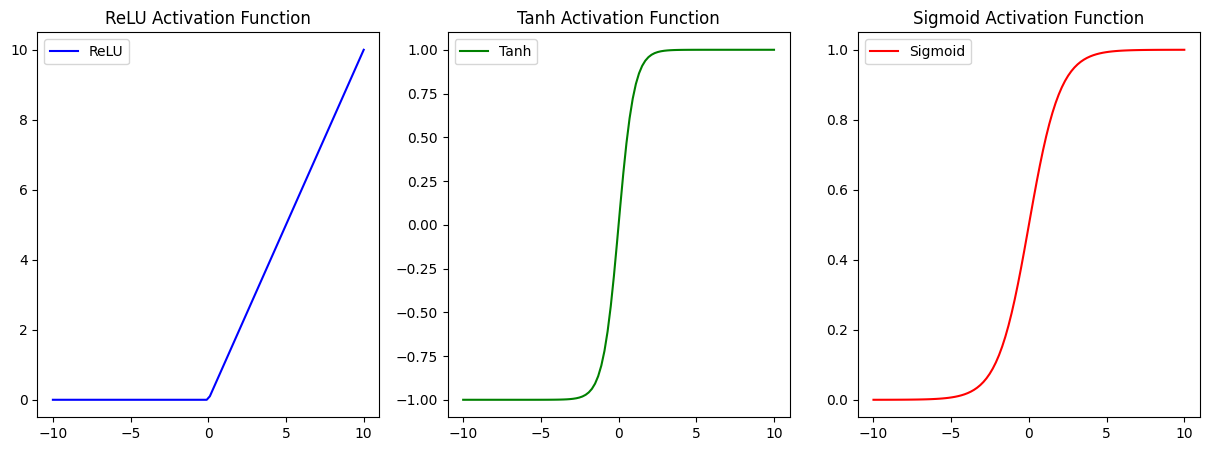

Log Loss (Scratch): 0.3714
Log Loss (Scikit-Learn): 0.3501


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=5, n_informative=3,
                           n_redundant=1, n_repeated=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            loss = log_loss(y, y_pred)
            self.losses.append(loss)
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.sum(y_pred - y) / len(y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Train custom model
model_scratch = LogisticRegressionScratch()
model_scratch.fit(X_train, y_train)

y_pred_scratch = model_scratch.predict_proba(X_test)
scratch_log_loss = log_loss(y_test, y_pred_scratch)

# Train using Scikit-Learn
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict_proba(X_test)[:, 1]
sklearn_log_loss = log_loss(y_test, y_pred_sklearn)

# Activation Function Plots
x_vals = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_vals, relu(x_vals), label='ReLU', color='blue')
plt.title("ReLU Activation Function")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x_vals, tanh(x_vals), label='Tanh', color='green')
plt.title("Tanh Activation Function")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x_vals, sigmoid(x_vals), label='Sigmoid', color='red')
plt.title("Sigmoid Activation Function")
plt.legend()

plt.show()

# Print Log Loss results
print(f"Log Loss (Scratch): {scratch_log_loss:.4f}")
print(f"Log Loss (Scikit-Learn): {sklearn_log_loss:.4f}")


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid_derivative(x):
    return x * (1 - x)

# Generate dataset
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=1, random_state=42)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
input_size = X_train.shape[1]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_output = relu(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)

    # Compute loss
    loss = log_loss(y_train, output)

    # Backpropagation
    output_error = y_train - output
    output_gradient = output_error * sigmoid_derivative(output)
    hidden_error = np.dot(output_gradient, weights_hidden_output.T)
    hidden_gradient = hidden_error * relu_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += np.dot(hidden_output.T, output_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += np.dot(X_train.T, hidden_gradient) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

# Predictions
hidden_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_output_test = relu(hidden_input_test)
output_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
y_pred_scratch = sigmoid(output_input_test).round()
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

In [9]:
from sklearn.neural_network import MLPClassifier

ann_sklearn = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='adam', max_iter=1000)
ann_sklearn.fit(X_train, y_train.ravel())
y_pred_sklearn = ann_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(4, activation='relu', input_shape=(5,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
accuracy_keras = model.evaluate(X_test, y_test, verbose=0)[1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


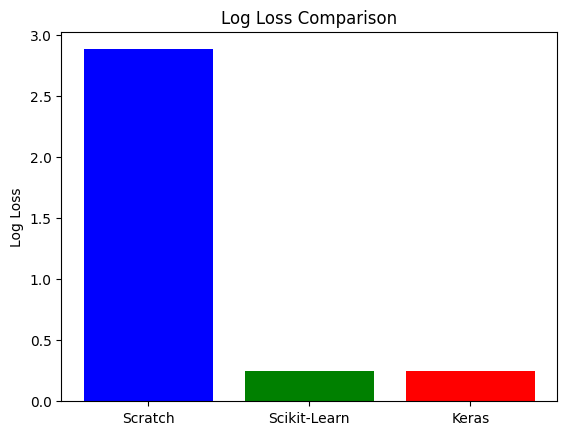

In [11]:
loss_values = [log_loss(y_test, y_pred_scratch), log_loss(y_test, ann_sklearn.predict_proba(X_test)[:,1]), model.evaluate(X_test, y_test, verbose=0)[0]]
labels = ['Scratch', 'Scikit-Learn', 'Keras']

plt.bar(labels, loss_values, color=['blue', 'green', 'red'])
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')

plt.show()